## Dataset downloader


In [1]:
!pip install wget

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.


In [2]:
# Better downloading utility
import os
import wget

files_to_get = ["https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test.csv", 
                "https://raw.githubusercontent.com/maximsachs/SEN163A_Assignment1/main/transactions_test_100k.csv"]

files_already_downloaded = os.listdir()
for file_url in files_to_get:
  filename = file_url.split("/")[-1]
  if not filename in files_already_downloaded:
    print(f"Downloading {filename}")
    wget.download(file_url)
  else:
    print(f"File {filename} has already been downloaded")

File transactions_test.csv has already been downloaded
File transactions_test_100k.csv has already been downloaded


#Assignment 1

In [3]:
import pandas 
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
graphs_folder = "graphs"
if not os.path.exists(graphs_folder):
  os.makedirs(graphs_folder)

In [4]:
# Opening the sample data file:
# Whole dataset 7734835 transactions.csv
# df = pandas.read_csv("transactions_test.csv")
df = pandas.read_csv("df_transactions.csv")

In [5]:
df

,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,1,1,TRANSFER,10,C1231006815,1.701360e+08,170135990,C52983754,10,20
1,2,2,1,TRANSFER,9839640,C1231006815,1.701360e+08,160296360,M1979787155,0,9839630
2,3,3,1,TRANSFER,1864280,C1666544295,2.124900e+07,19384720,M2044282225,0,1864280
3,4,4,1,TRANSFER,181000,C1305486145,1.810000e+05,0,C553264065,0,181000
4,5,5,1,TRANSFER,181000,C840083671,1.810000e+05,0,C38997010,21182000,21363000
...,...,...,...,...,...,...,...,...,...,...,...
7734829,7734830,7734830,743,TRANSFER,10,C1162922333,6.311409e+09,6311409270,C52983754,13721940,13721950
7734830,7734831,7734831,743,TRANSFER,6311409280,C1162922333,6.311409e+09,0,C1365125890,351848635,6663257905
7734831,7734832,7734832,743,TRANSFER,850002520,C1685995037,8.500025e+08,0,C2080388513,0,850002520
7734832,7734833,7734833,743,TRANSFER,850002520,C1280323807,8.500025e+08,-5,C873221189,8150751035,9000753550


Assignment Tasks:
1.  Describe the dataset you received, in words and with supporting visualizations.
2.  Check the dataset for consistency, and document any inconsistency you find, as well
as reasons for these inconsistencies.
3.  Identify all fraudulent activity within the dataset, and provide supporting evidence
and visualizations.
4.  Document your method and code used during the investigation




## Describe the dataset

In [6]:
description = df.describe()
print(f"There are {df.shape[0]} transactions in the dataset.")
mean_transaction = description.loc["mean", "amount"]
median_transaction =  df["amount"].median()
total_transaction =  df["amount"].sum()
print(f"The mean transaction has a value of {mean_transaction}, median transaction is {median_transaction} and a total of {total_transaction} was transacted.")
description

There are 7734834 transactions in the dataset.
The mean transaction has a value of 147953140.1037915, median transaction is 34245655.0 and a total of 1144392978481570 was transacted.


,tx_index,tx_index.1,timestamp,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
count,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06,7.734834e+06
mean,3.867418e+06,3.867418e+06,2.434319e+02,1.479531e+08,8.339802e+08,6.860270e+08,1.297193e+09,1.445146e+09
std,2.232854e+06,2.232854e+06,1.423561e+02,5.519739e+08,2.890095e+09,2.943681e+09,3.441619e+09,3.647220e+09
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-4.621192e+10,-9.244552e+10,-4.366623e+09,-4.234680e+09
25%,1.933709e+06,1.933709e+06,1.560000e+02,3.954592e+06,0.000000e+00,-1.072120e+08,0.000000e+00,8.961312e+06
50%,3.867418e+06,3.867418e+06,2.390000e+02,3.424566e+07,1.416400e+07,-2.773930e+06,1.330728e+07,1.830557e+08
75%,5.801126e+06,5.801126e+06,3.350000e+02,1.744628e+08,1.073520e+08,6.296063e+07,1.277121e+09,1.514394e+09
max,7.734834e+06,7.734834e+06,7.430000e+02,9.244552e+10,7.743097e+10,7.742894e+10,3.572774e+11,3.574408e+11


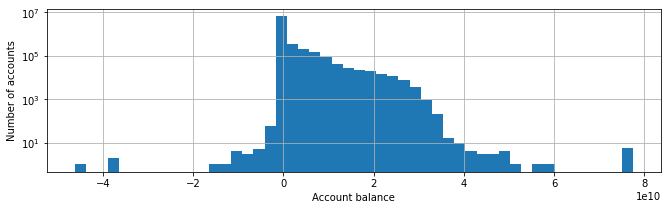

In [7]:
ax = df["oldbalanceOrig"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of accounts")
ax.set_xlabel("Account balance")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_account_balances_old.pdf"), bbox_inches='tight')

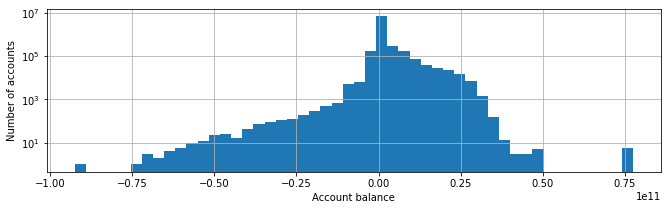

In [46]:
ax = df["newbalanceOrig"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of accounts")
ax.set_xlabel("Account balance")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_account_balances_new.pdf"), bbox_inches='tight')

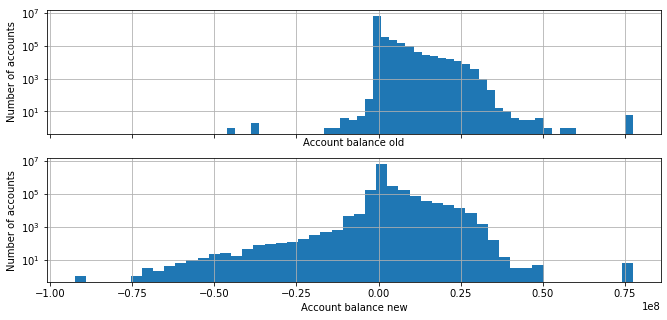

In [58]:
fig, axs = plt.subplots(2, sharex=True)
# fig.suptitle('Vertically stacked subplots')
# axs[0].plot(x, y)
# axs[1].plot(x, -y)

df["oldbalanceOrig"].divide(1000).hist(ax=axs[0], bins=50)
axs[0].set_yscale('log')
axs[0].set_ylabel("Number of accounts")
axs[0].set_xlabel("Account balance old")
df["newbalanceOrig"].divide(1000).hist(ax=axs[1], bins=50)
axs[1].set_yscale('log')
axs[1].set_ylabel("Number of accounts")
axs[1].set_xlabel("Account balance new")
fig = plt.gcf()
fig.set_size_inches(11, 5)
plt.savefig(os.path.join(graphs_folder, "Histogram_account_balances_stacked.pdf"), bbox_inches='tight')

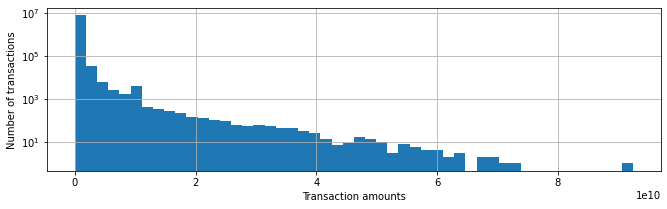

In [9]:
ax = df["amount"].hist(bins=50)
ax.set_yscale('log')
ax.set_ylabel("Number of transactions")
ax.set_xlabel("Transaction amounts")
fig = plt.gcf()
fig.set_size_inches(11, 3)
plt.savefig(os.path.join(graphs_folder, "Histogram_Transaction_amounts.pdf"), bbox_inches='tight')

Richest account has 77428942492


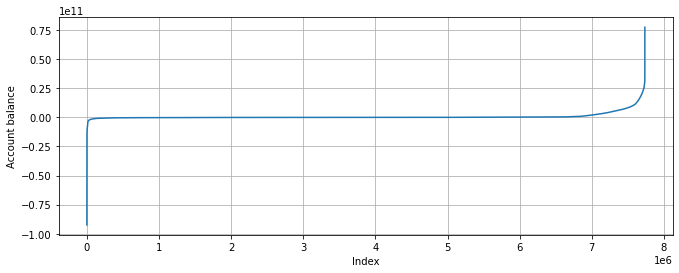

In [10]:
account_balances = df["newbalanceOrig"].copy()
account_balances.sort_values(inplace=True)
account_balances.index = list(range(account_balances.shape[0]))
ax = account_balances.plot()
ax.grid()
ax.set_ylabel("Account balance")
ax.set_xlabel("Index")
# ax.set_yscale('log')
fig = plt.gcf()
fig.set_size_inches(11, 4)
plt.savefig(os.path.join(graphs_folder, "Account_balance_distribution.pdf"), bbox_inches='tight')
richest_balance = account_balances.iloc[-1]
print(f"Richest account has {richest_balance}")

In [11]:
top_to_show = 0.01
top_index = int(account_balances.shape[0]*(1-top_to_show))
portion_of_wealth = account_balances.iloc[top_index:].sum()/account_balances.sum()
print(f"The top {top_to_show*100}% of addresses own {portion_of_wealth*100}% of the wealth")

The top 1.0% of addresses own 30.93345187884116% of the wealth


## transactions above certain amounts (very large, or very small)

In [12]:
large_amount = 1000000
large_transactions = df[df["amount"] > large_amount]
print(f"There are {large_transactions.shape[0]} transactions with an amount larger than {large_amount}.")
large_transactions

There are 6219980 transactions with an amount larger than 1000000.


,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
1,2,2,1,TRANSFER,9839640,C1231006815,1.701360e+08,160296360,M1979787155,0,9839630
2,3,3,1,TRANSFER,1864280,C1666544295,2.124900e+07,19384720,M2044282225,0,1864280
5,6,6,1,TRANSFER,11668140,C2048537720,4.155400e+07,29885855,M1230701703,0,11668135
7,8,8,1,TRANSFER,7817710,C90045638,5.386000e+07,46042290,M573487274,0,7817700
8,9,9,1,TRANSFER,7107770,C154988899,1.831950e+08,176087225,M408069119,0,7107765
...,...,...,...,...,...,...,...,...,...,...,...
7734828,7734829,7734829,743,TRANSFER,6311409280,C1529008245,6.311409e+09,0,C1881841831,0,6311409280
7734830,7734831,7734831,743,TRANSFER,6311409280,C1162922333,6.311409e+09,0,C1365125890,351848635,6663257905
7734831,7734832,7734832,743,TRANSFER,850002520,C1685995037,8.500025e+08,0,C2080388513,0,850002520
7734832,7734833,7734833,743,TRANSFER,850002520,C1280323807,8.500025e+08,-5,C873221189,8150751035,9000753550


In [31]:
small_amount = 10
small_transactions = df[df["amount"] <= small_amount]
print(f"There are {small_transactions.shape[0]} transactions with an amount smaller than {small_amount}.")
small_transactions

There are 1372211 transactions with an amount smaller than 10.


,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,1,1,TRANSFER,10,C1231006815,1.701360e+08,170135990,C52983754,10,20
6,7,7,1,TRANSFER,10,C90045638,5.386000e+07,53859990,C52983754,20,30
13,14,14,1,TRANSFER,10,C249177573,2.077100e+07,20770990,C52983754,30,40
16,17,17,1,TRANSFER,10,C1716932897,1.012700e+07,10126990,C52983754,40,50
20,21,21,1,TRANSFER,10,C761750706,4.500000e+05,449990,C52983754,50,60
...,...,...,...,...,...,...,...,...,...,...,...
7734802,7734803,7734803,741,TRANSFER,10,C31496887,1.449453e+08,144945330,C52983754,13721900,13721910
7734808,7734809,7734809,742,TRANSFER,10,C1970706589,4.009058e+09,4009058380,C52983754,13721910,13721920
7734814,7734815,7734815,742,TRANSFER,10,C1674778854,5.465246e+07,54652450,C52983754,13721920,13721930
7734819,7734820,7734820,742,TRANSFER,10,C1226129332,2.583554e+08,258355410,C52983754,13721930,13721940


In [32]:
# Transactions where a large portion of the original balance is being sent:
# This is not so useful as a measure, since often times accounts can go into a negative balance (debt).
amount_to_balance_ratio = 1
high_ratio_transactions = df[(df["amount"] / df["oldbalanceOrig"]) > amount_to_balance_ratio]
high_ratio_transactions

,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
10,11,11,1,TRANSFER,4024360,C1265012928,2671000.0,-1353360,M1176932104,0,4024360
12,13,13,1,TRANSFER,9644940,C1900366749,4465000.0,-5179940,C997608398,10845000,20489940
17,18,18,1,TRANSFER,11633760,C1716932897,10127000.0,-1506760,M801569151,0,11633750
19,20,20,1,TRANSFER,229133940,C905080434,15325000.0,-213808940,C476402209,5083000,234216940
21,22,22,1,TRANSFER,1563820,C761750706,450000.0,-1113820,M1731217984,0,1563810
...,...,...,...,...,...,...,...,...,...,...,...
7734468,7734469,7734469,718,TRANSFER,159188220,C691808084,3859000.0,-155329220,C1818183087,0,159188220
7734469,7734470,7734470,718,TRANSFER,186273840,C102120699,168046000.0,-18227845,C1515639522,24893670,211167505
7734470,7734471,7734471,718,TRANSFER,82096450,C614459560,13492000.0,-68604450,C855350324,0,82096450
7734591,7734592,7734592,727,TRANSFER,263401810,C850961884,81961790.0,-181440020,C1203132980,251586770,514988580


## same transactions from multiple different accounts

## See accounts with unusually many transactions, or receiving unusually many transactions. Number of times an account is used (only once?)

In [33]:
amount_received_per_nameDest = df.groupby("nameDest")["amount"].agg(['mean', 'count', 'sum'])
amount_received_per_nameDest.sort_values("count", inplace=True, ascending=False)
top_address_transaction_count = amount_received_per_nameDest.iloc[0]["count"]
top_address_transaction_sum = amount_received_per_nameDest.iloc[0]["sum"]
print(f"The top account receives {int(top_address_transaction_count)} which corresponds to a total transaction amount received of {top_address_transaction_sum}.")

amount_received_per_nameDest

The top account receives 1372194 which corresponds to a total transaction amount received of 13721940.0.


,mean,count,sum
nameDest,,,
C52983754,1.000000e+01,1372194,13721940
C1286084959,6.852119e+08,113,77428943310
C985934102,3.892008e+08,109,42422887980
C665576141,8.452322e+08,105,88749384380
C2083562754,5.203327e+08,102,53073938760
...,...,...,...
M1576070058,4.340330e+06,1,4340330
M1576069003,6.849950e+06,1,6849950
M1576065179,5.803000e+04,1,58030


In [34]:
print("Middle man addresses might be malicious if they often receive amounts and then immediately send it onwards.")
print("This could beamount_sent_per_nameOrig identified by comparing the total amount received by an address to the total amount being sent by an address.")
amount_sent_per_nameOrig = df.groupby("nameOrig")["amount"].agg(['mean', 'count', 'sum'])
amount_sent_per_nameOrig.sort_values("count", inplace=True, ascending=False)
amount_sent_per_nameOrig

Middle man addresses might be malicious if they often receive amounts and then immediately send it onwards.
This could beamount_sent_per_nameOrig identified by comparing the total amount received by an address to the total amount being sent by an address.


,mean,count,sum
nameOrig,,,
C1286084959,999993.0,20,19999860
C783764353,6500187.5,4,26000750
C523911767,12715075.0,4,50860300
C1642575310,95532667.5,4,382130670
C953340741,37391887.5,4,149567550
...,...,...,...
C1723011543,3514710.0,1,3514710
C172301080,69784490.0,1,69784490
C1723010721,16252110.0,1,16252110


In [35]:
# Lets see if there is overlap between the addresses receiving transactions and those sending.
# At the moment 0 interesections are found, but this could be an artefact of limiting to the top 100k transactions.
set_receiving_addresses = set(amount_received_per_nameDest.index.values)
set_sending_addresses = set(amount_sent_per_nameOrig.index.values)
addresses_both_sending_and_receiving = set_receiving_addresses.intersection(set_sending_addresses)
print(f"There are {len(addresses_both_sending_and_receiving)} addresses both sending and receiving.")
suspicious_transactions_origin = df[df['nameOrig'].isin(addresses_both_sending_and_receiving)].copy()
suspicious_transactions_dest = df[df['nameDest'].isin(addresses_both_sending_and_receiving)].copy()
suspicious_transactions_origin.sort_values("nameOrig", inplace=True)
suspicious_transactions_dest.sort_values("nameDest", inplace=True)

There are 1770 addresses both sending and receiving.


In [36]:
suspicious_transactions_origin

,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
4370613,4370614,4370614,262,TRANSFER,160544750,C1000194623,0.000000e+00,-160544750,C1773068773,6702456390,6863001140
664133,664134,664134,21,TRANSFER,7697350,C1000836905,8.605668e+07,78359325,M1273990188,0,7697345
3941617,3941618,3941618,250,TRANSFER,104450890,C1002007146,2.174300e+07,-82707890,C1467343354,0,104450880
3941616,3941617,3941617,250,TRANSFER,10,C1002007146,2.174300e+07,21742990,C52983754,6984270,6984280
6219023,6219024,6219024,356,TRANSFER,3375860,C1002075438,3.814640e+08,378088135,M224544617,0,3375855
...,...,...,...,...,...,...,...,...,...,...,...
3585310,3585311,3585311,230,TRANSFER,426659550,C988400738,3.026900e+07,-396390555,C2027960384,2089057005,2515716550
5614225,5614226,5614226,329,TRANSFER,243834490,C988625655,9.982486e+08,754414065,C950980214,6141866400,6385700885
2154586,2154587,2154587,162,TRANSFER,60387690,C991247178,1.179267e+09,1118879635,C1344561835,2892277770,2952665460
5403354,5403355,5403355,323,TRANSFER,160468810,C99793542,2.068369e+08,46368055,C1335908043,13265830645,13426299450


In [37]:
suspicious_transactions_dest

,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
7684306,7684307,7684307,688,TRANSFER,257419830,C762897453,94815000.0,-162604830,C1000194623,-160544750,96875080
7095791,7095792,7095792,402,TRANSFER,365526130,C910944764,26434000.0,-339092130,C1000836905,944683800,1310209930
6920116,6920117,6920117,397,TRANSFER,43902520,C200193123,136000.0,-43766520,C1000836905,893279450,937181960
4599174,4599175,4599175,280,TRANSFER,353474480,C1541142123,99206000.0,-254268480,C1000836905,78359325,431833805
6649193,6649194,6649194,379,TRANSFER,54064620,C1045591023,0.0,-54064625,C1000836905,804545275,858609890
...,...,...,...,...,...,...,...,...,...,...,...
3415281,3415282,3415282,225,TRANSFER,141542290,C1201909240,300000.0,-141242290,C99793542,0,141542290
3917893,3917894,3917894,250,TRANSFER,65294580,C1882321141,0.0,-65294580,C99793542,141542290,206836870
6200073,6200074,6200074,355,TRANSFER,292568870,C1481883316,11536000.0,-281032875,C999233538,-11414255,281154610
7711135,7711136,7711136,692,TRANSFER,89510010,C1240536701,52050000.0,-37460015,C999233538,339201220,428711225


## internal consistency of old \& new balances

In [38]:
# There are a number of transactions where likely rounding error has occured. 
# This is broadly speaking not a problem it is in most cases a small amount only, so 0.01. But in the mass it appears quite substantial.
# See the movie office space for more ideas on how to use rounding errors in the banking system.
inconsistent_old_balances = df[np.invert(np.isclose(df["oldbalanceOrig"] - df["amount"], df["newbalanceOrig"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_old_balances["old_balance_error"] = df["oldbalanceOrig"] - df["amount"] - df["newbalanceOrig"]
print(inconsistent_old_balances["old_balance_error"].describe())
print("Total loss rounded away:", inconsistent_old_balances["old_balance_error"].sum())
# ax = inconsistent_old_balances["old_balance_error"].hist(bins=50)
# ax.set_yscale('log')
# print(ax.get_xlim())
inconsistent_old_balances

count    1.646402e+06
mean     4.999987e+00
std      8.678457e-03
min     -1.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: old_balance_error, dtype: float64
Total loss rounded away: 8231988.0


,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,old_balance_error
5,6,6,1,TRANSFER,11668140,C2048537720,41554000.0,29885855,M1230701703,0,11668135,5.0
8,9,9,1,TRANSFER,7107770,C154988899,183195000.0,176087225,M408069119,0,7107765,5.0
9,10,10,1,TRANSFER,7861640,C1912850431,176087230.0,168225585,M633326333,0,7861635,5.0
15,16,16,1,TRANSFER,2560740,C1648232591,5070000.0,2509255,M972865270,0,2560735,5.0
18,19,19,1,TRANSFER,4098780,C1026483832,503264000.0,499165215,M1635378213,0,4098775,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7734818,7734819,7734819,742,TRANSFER,303846740,C1148860488,303846740.0,-5,C846260566,343660880,647507615,5.0
7734823,7734824,7734824,742,TRANSFER,63416990,C994950684,63416990.0,-5,C1662241365,438545215,501962200,5.0
7734826,7734827,7734827,743,TRANSFER,339682130,C2013999242,339682130.0,-5,C1850423904,0,339682125,5.0
7734827,7734828,7734828,743,TRANSFER,339682130,C786484425,339682130.0,-5,C776919290,382920110,722602235,5.0


In [39]:
# For the destination balances in some cases also 2 cents are obtained. which is very odd.
inconsistent_new_balances = df[np.invert(np.isclose(df["oldbalanceDest"] + df["amount"], df["newbalanceDest"],rtol=1e-08, atol=1e-10))].copy()
inconsistent_new_balances["new_balance_error"] = df["oldbalanceDest"] + df["amount"] - df["newbalanceDest"]
print(inconsistent_new_balances["new_balance_error"].describe())
total_rounding_error = inconsistent_new_balances["new_balance_error"].sum()
print("Total loss rounded away:", total_rounding_error)
# ax = inconsistent_new_balances["new_balance_error"].hist(bins=50)
# ax.set_yscale('log')
inconsistent_new_balances

count    1.844007e+06
mean     7.291691e+00
std      2.491307e+00
min      5.000000e+00
25%      5.000000e+00
50%      5.000000e+00
75%      1.000000e+01
max      1.000000e+01
Name: new_balance_error, dtype: float64
Total loss rounded away: 13445930


,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,new_balance_error
1,2,2,1,TRANSFER,9839640,C1231006815,170136000.0,160296360,M1979787155,0,9839630,10
5,6,6,1,TRANSFER,11668140,C2048537720,41554000.0,29885855,M1230701703,0,11668135,5
7,8,8,1,TRANSFER,7817710,C90045638,53860000.0,46042290,M573487274,0,7817700,10
8,9,9,1,TRANSFER,7107770,C154988899,183195000.0,176087225,M408069119,0,7107765,5
9,10,10,1,TRANSFER,7861640,C1912850431,176087230.0,168225585,M633326333,0,7861635,5
...,...,...,...,...,...,...,...,...,...,...,...,...
7734805,7734806,7734806,741,TRANSFER,48442880,C1112979339,48442880.0,-5,C2114078084,0,48442875,5
7734815,7734816,7734816,742,TRANSFER,54652460,C1674778854,54652460.0,0,C1930074465,0,54652450,10
7734817,7734818,7734818,742,TRANSFER,303846740,C959102961,303846740.0,-5,C114421319,0,303846735,5
7734820,7734821,7734821,742,TRANSFER,258355420,C1226129332,258355420.0,0,C1744173808,0,258355410,10


In [40]:
print("This rounding error corresponds to ", total_rounding_error/df["amount"].sum(), "of the amount transacted")
print("and to ", total_rounding_error/df["newbalanceOrig"].sum(), "of the total balances")
error_per_tick = total_rounding_error/df["timestamp"].iloc[-1]
ticks_till_gone = 0.5*df["newbalanceOrig"].sum()/error_per_tick
print("At this rate of transacting this correspnds to",ticks_till_gone , "ticks until half the total balance has been lost to rounding.")
print("which, assuming 1 tick per second, is the equivalent of", ticks_till_gone/(86400*365), "years")

This rounding error corresponds to  1.1749399247311566e-08 of the amount transacted
and to  2.5339533916240284e-09 of the total balances
At this rate of transacting this correspnds to 146608852881.0323 ticks until half the total balance has been lost to rounding.
which, assuming 1 tick per second, is the equivalent of 4648.936227835879 years


## timestamps with unusual high activity

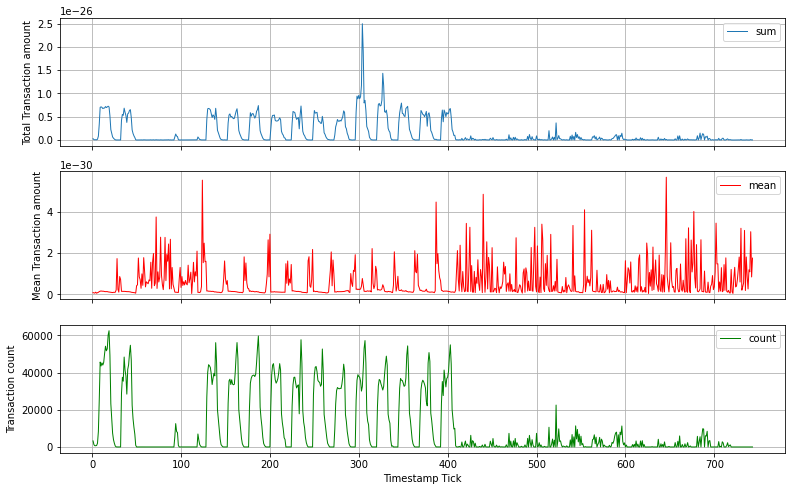

In [75]:
fig, axs = plt.subplots(3, sharex=True)
df["amount"] = df["amount"].divide(1000)
transactoins_per_timestamp = df.groupby("timestamp")["amount"].agg(['mean', 'count', 'sum'])
transactoins_per_timestamp["sum"].plot(lw=1, ax = axs[0])
axs[0].legend()
axs[0].set_ylabel("Total Transaction amount")
axs[1].set_ylabel("Mean Transaction amount")
axs[0].set_xlabel("Timestamp Tick")
axs[0].grid()
transactoins_per_timestamp["mean"].plot(ax=axs[1], lw=1, style="-", color="r")
axs[1].grid()
axs[1].legend()
transactoins_per_timestamp["count"].plot(ax=axs[2],lw=1, style="-",color="g")
axs[2].grid()
axs[2].set_xlabel("Timestamp Tick")
axs[2].legend()
axs[2].set_ylabel("Transaction count")
fig = plt.gcf()
fig.set_size_inches(13, 8)
plt.savefig(os.path.join(graphs_folder, "transactions_per_tick_stacked.pdf"), bbox_inches='tight')
plt.show()

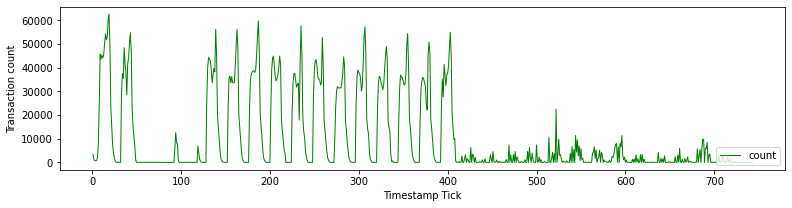

,mean,count,sum
timestamp,,,
1,8.691510e+07,3284,285429186910
2,7.077562e+07,1214,85921606020
3,6.320275e+07,685,43293885750
4,1.058201e+08,689,72910029810
5,5.707781e+07,798,45548091080
...,...,...,...
739,1.184845e+09,14,16587831400
740,1.090423e+09,7,7632963590
741,3.028586e+09,29,87828993060


In [42]:
# ax3.spines["right"].set_position(("axes", 1.05))
# ax3.spines["right"].set_visible(True)
ax3 = transactoins_per_timestamp["count"].plot(lw=1, style="-",color="g")
ax3.set_xlabel("Timestamp Tick")
ax3.legend(loc="lower right")
fig = plt.gcf()
fig.set_size_inches(13, 3)
ax3.set_ylabel("Transaction count")
plt.savefig(os.path.join(graphs_folder, "transaction_count_per_tick.pdf"), bbox_inches='tight')
plt.show()

transactoins_per_timestamp

## Someone sending to themselves, destination address equals origin.

In [43]:
# The following output is empty, so no transaction is sending to itself.
df[df["nameOrig"] == df["nameDest"]]

,tx_index,tx_index.1,timestamp,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest


## How many addresses start with M or C:

In [44]:
set_all_addresses = set(df["nameOrig"]).union(set(df["nameDest"]))
first_letter_counter = defaultdict(lambda: 0)
for address in set_all_addresses:
    first_letter = address[0]
    first_letter_counter[first_letter] += 1
print(first_letter_counter)

defaultdict(<function <lambda> at 0x7f10bafdab00>, {'M': 2150401, 'C': 6923501})


## Office Space / Hacker (1997)

In [45]:
# General idea is to round off the transaction, and send the difference to a fixed account.
